# Les 7: Exercise - solutions

We will be using the heptathlon dataset from the 2020 Tokyo olympics. 

The aim is to process this data, fix missing values if there are any, perform some scalings, and visualise the results. But let's start at the beginning and read in the data. 

For sake of the examples, read in the data and store it in the Tokyo2020 variable.



In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi']= 100

In [2]:
Tokyo2020 = pd.read_csv("tokyo_2020_heptathlon_data/Tokyo_2020_hepathlon.txt", sep = ";")
Tokyo2020


,Rank,Country,Name,Final_Points,100m_hurdles_Result,100m_hurdles_Points,200m_Result,200m_Points,800m_Result,800m_Points,High_jump_Result,High_jump_Points,Javelin_Result,Javelin_Points,Long_jump_Result,Long_jump_Points,Shot_put_Result,Shot_put_Points
0,1.0,BEL,THIAM Nafissatou,6791,13.54,1044,24.90,896,2:15.98,879,1.92,1132,54.68,951,6.60,1040,14.82,849
1,2.0,NED,VETTER Anouk,6689,13.09,1111,23.81,999,2:18.72,841,1.8,978,51.2,883,6.47,997,15.29,880
2,3.0,NED,OOSTERWEGEL Emma,6590,13.36,1071,24.25,957,2:11.09,949,1.8,978,54.6,949,6.29,940,13.28,746
3,4.0,BEL,VIDTS Noor,6571,13.17,1099,23.70,1010,2:09.05,979,1.83,1016,41.8,702,6.32,949,14.33,816
4,5.0,USA,WILLIAMS Kendell,6508,12.97,1129,24.00,981,2:16.91,866,1.8,978,48.78,836,6.57,1030,12.41,688
5,6.0,USA,KUNZ Annie,6420,13.49,1052,24.12,969,2:15.93,880,1.8,978,42.77,721,6.32,949,15.15,871
6,7.0,GER,SCHAFER Carolin,6419,13.29,1081,24.33(.325),949,2:14.82,895,1.8,978,54.1,940,5.78,783,13.99,793
7,8.0,AUT,DADIC Ivona,6403,13.61,1034,24.33(.321),949,2:15.10,891,1.83,1016,48.4,829,6.11,883,14.10,801
8,9.0,USA,BOUGARD Erica,6379,13.14,1103,24.08,973,2:15.92,880,1.86,1054,46.6,794,6.06,868,12.69,707
9,10.0,CHN,ZHENG Ninali,6318,13.27,1084,24.56,928,2:10.35,960,1.8,978,42.6,717,6.12,887,13.55,764


# Stuff you can use/adapt for this lesson

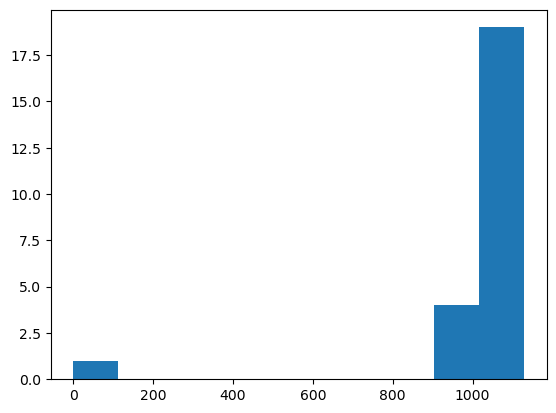

In [3]:
plt.hist(Tokyo2020['100m_hurdles_Points']);

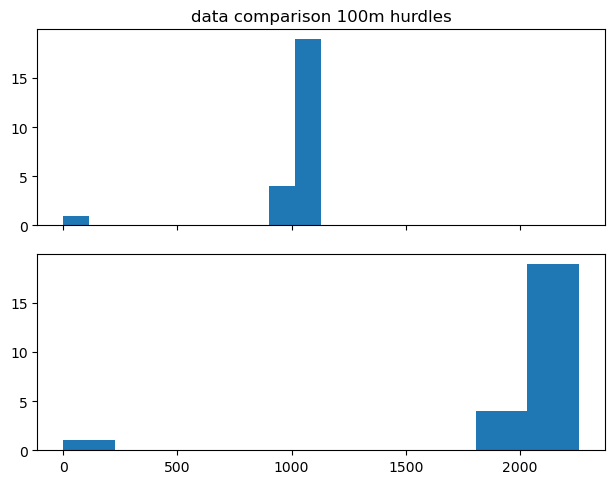

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True, sharex= True)
fig.tight_layout()
ax1.set_title('data comparison 100m hurdles')
ax1.hist(Tokyo2020['100m_hurdles_Points'])
ax2.hist(Tokyo2020['100m_hurdles_Points']*2)
plt.show()

## a question

I multiplied the data by 2. Why is the left bar in the histogram bigger than in the beginning? Is this correct yes or no. If so then explain, if not how would you fix this?

In [5]:
# a function that you can make yourself
def functionexample(data):
    """
    Function to multiply data times 2
    :param data: The data to be multiplied with 2
    """
    data_multiplied = data*2
    
    return data_multiplied

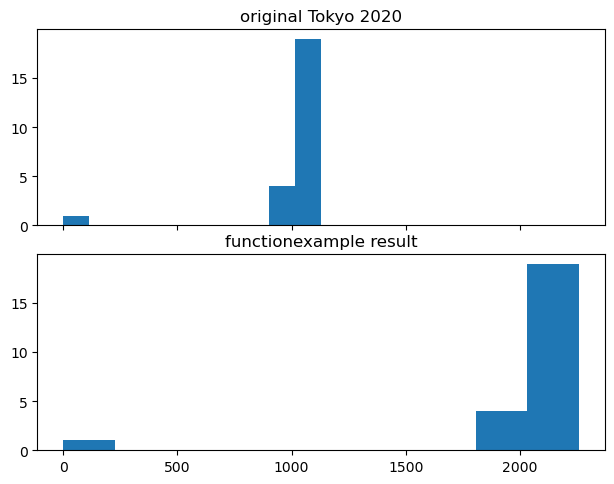

In [6]:
multiplied_data = functionexample( Tokyo2020['100m_hurdles_Points'] )

fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True, sharex = True)
fig.tight_layout()
ax1.set_title('original Tokyo 2020')
ax1.hist(Tokyo2020['100m_hurdles_Points'])
ax2.set_title('functionexample result')
ax2.hist(multiplied_data)
plt.show()

## Some basic stats

In [7]:
# the mean
Tokyo2020['100m_hurdles_Points'].mean()

1014.75

In [8]:
# the median
Tokyo2020['100m_hurdles_Points'].median()

1057.0

In [9]:
# the standard deviation (SD)
Tokyo2020['100m_hurdles_Points'].std()

220.32569764663918

# Excercise during this lesson:

 During this lesson you will make your own scaling function(s). We will aply this to the hepathlon dataset of the Tokyo 2020 olympics which Nafi Thiam obviously won.
 
 In each part below you will need to implement a scaling method in a function. If you want you can also make 1 do-it-all function (this is only a tiny bit more complex).
 
 After each step you will then be asked to use your function on a part of the dataset and to visualise the result. 
 
 note: you can start from the 'functionexample' I provided above, and adapt this one as you go along.

# Exercise 1: clean the data

There are a few issues with missing values in the data. Find the problems and fix them before we start. 

Hint: You don't have to manually fix these, you can use the pandas.read_csv function to fix everything the moment you read the file with the na_values option. Look online to see how this works or just try it.

In [10]:
Tokyo2020 = pd.read_csv("tokyo_2020_heptathlon_data/Tokyo_2020_hepathlon.txt", 
                        sep = ";", na_values = ['DNS', 'DNF'])
Tokyo2020.tail()

,Rank,Country,Name,Final_Points,100m_hurdles_Result,100m_hurdles_Points,200m_Result,200m_Points,800m_Result,800m_Points,High_jump_Result,High_jump_Points,Javelin_Result,Javelin_Points,Long_jump_Result,Long_jump_Points,Shot_put_Result,Shot_put_Points
19,20.0,CAN,ELLENWOOD Georgia,6077.0,13.47,1055,24.51,932,2:19.21,834,1.83,1016,44.11,746,5.86,807,12.39,687
20,NaN,NED,BROERSEN Nadine,NaN,13.74,1015,25.57,835,NaN,0,1.80,978,NaN,0,NaN,0,14.50,827
21,NaN,GBR,JOHNSON-THOMPSON Katarina,NaN,13.27,1084,DQ,0,NaN,0,1.86,1054,NaN,0,NaN,0,13.31,748
22,NaN,BUR,KOALA Marthe,NaN,13.07,1114,NaN,0,NaN,0,1.74,903,NaN,0,NaN,0,12.54,697
23,NaN,CUB,RODRIGUEZ Yorgelis,NaN,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0


# Excercise 2: Data centering

Create a function which can receive data as input, and which returns the centered data. If you do not remember what centering is, look at the slides of the corresponding lesson.

1. Create a function to center data.
2. Center the Javelin Result. 
3. Visualise the centered Javelin results.

In [11]:
# a function that you can make yourself
def centerfunction(data):
    """
    Function to multiply data times 2
    :param data: The data to be multiplied with 2
    """
    data_centered = data - data.mean()
    
    return data_centered

In [12]:
centered_javelin = centerfunction(Tokyo2020['Javelin_Result'])
centered_javelin.mean()

-4.618527782440651e-15

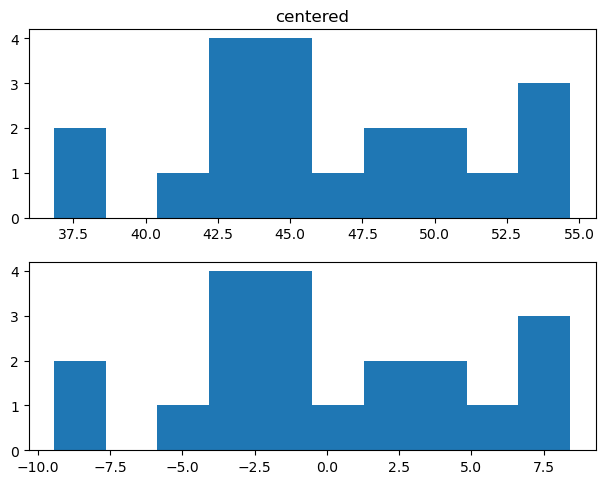

In [13]:

fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True)
fig.tight_layout()
ax1.set_title('original')
ax1.hist(Tokyo2020['Javelin_Result'])
ax1.set_title('centered')
ax2.hist(centered_javelin)
plt.show()

# Excercise 3: Standardization (z score)


1. Create a function or update your function to calculate z-scores (i.e. to standardize data).
2. standardize the Loing Jump results 
3. Visualise the standardized Long Jump Results. 

In [14]:
def zscore_transform(data):
    """
    Function to multiply data times 2
    :param data: The data to be multiplied with 2
    :param whattodo: what to do with the data, can be center or z-score
    """
   
    data_result = (data - data.mean())/data.std()
    
    return data_result

In [15]:
zscore_longJump = zscore_transform(Tokyo2020['Long_jump_Result'])
zscore_longJump.mean()
zscore_longJump.std()

0.9999999999999999

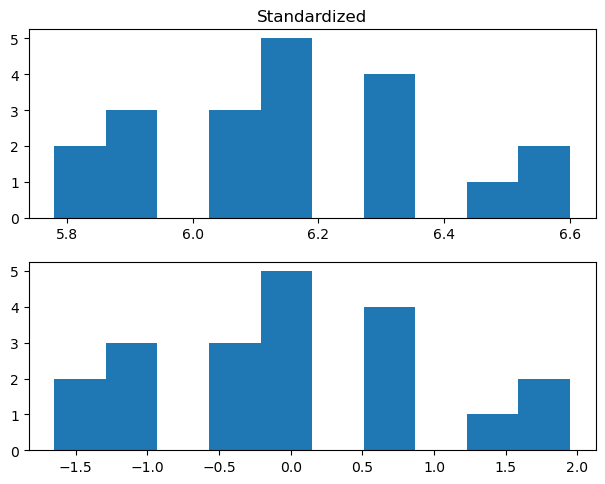

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True)
fig.tight_layout()
ax1.set_title('original')
ax1.hist(Tokyo2020['Long_jump_Result'])
ax1.set_title('Standardized')
ax2.hist(zscore_longJump)
plt.show()

# Excercise 4: Min-Max Normalization



1. Implement Min-Max normalisation in a new or in your exsiting function. Use the formula we have seen in class.
2. min-max normalize the Shot Put Results
3. Visualise the normalised Shot Put Results.

In [17]:
def minmax_norm(data):
    """
    Function to multiply data times 2
    :param data: The data to be multiplied with 2
    :param whattodo: what to do with the data, can be center or z-score
    """
   
    data_result = (data - data.min())/(data.max() - data.min())
    
    return data_result

In [18]:
minmax_shot = minmax_norm(Tokyo2020['Shot_put_Result'])
minmax_shot.max()
minmax_shot.min()

0.0

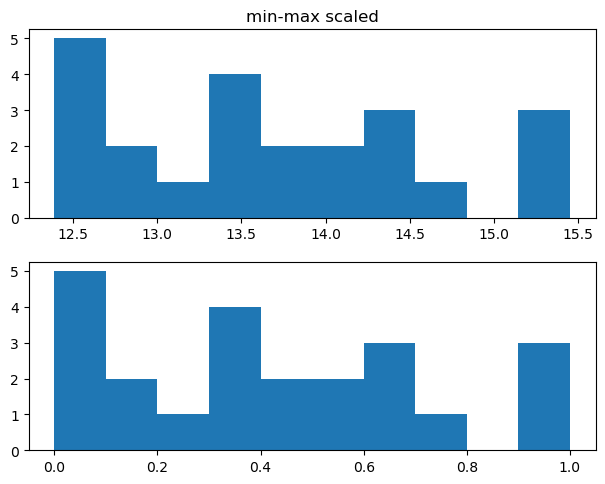

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True)
fig.tight_layout()
ax1.set_title('original')
ax1.hist(Tokyo2020['Shot_put_Result'])
ax1.set_title('min-max scaled')
ax2.hist(minmax_shot)
plt.show()

# Exercise 5: Visualise

In this exercise you need to visualise the data for the trainer of Nafi Thiam. The trainer wants to see in a single plot, on which sports we should focus more to make sure we win next time. 

You can choose the type of plot, whether you scale or normalise the data before plotting, etc. Just make sure it is 1 visualisation which anwer the question on which sports to focus. Note, this 1 visualisation can have multiple subplots within it. 